## NLP Research Areas

In [1]:
import re
import pandas as pd
import numpy as np
import swifter
from collections import Counter
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

nltk.download('punkt')  
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DaphneyJacques\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DaphneyJacques\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DaphneyJacques\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_excel("top_20.xlsx")
df.head(2)

,Faculty Name,Total Grants,Citations,Department,Research Areas.profiles,Interests.google scholar,Research Topics,Full Research Bio,Biography,Center Affiliations
0,Philip Rous,22616358.89,NaN,Physics,NaN,NaN,"nanophysics, condensed matter physics",My main research interests are in theoretical ...,Dr. Rous joined UMBC in 1990 having held postd...,NaN
1,Vandana Janeja,15812252.00,1490.0,Information Systems,NaN,"data mining, anomalous windows, spatio-tempora...","Data science, data mining, anomalous windows, ...",Her research is centered in the area of data s...,Vandana Janeja directs the Mdata Lab with a gr...,Center for Accelerated Real Time Analytics (CA...


In [5]:
def clean_text(text):
    stop_words_set = set(stopwords.words('english'))
    
    if pd.isna(text) or not isinstance(text, str):
        return ""
        
    cleaned_text = re.sub(r'[^a-zA-Z]', " ", text)	
    cleaned_text = cleaned_text.strip().lower()		
    # tokens = word_tokenize(cleaned_text)
    tokens = cleaned_text.split()
    filtered_words = [word for word in tokens if word not in stop_words_set]
    # lemmatized = [lemmatizer.lemmatize(word) for word in x.split() if word not in stop_words])
    cleaned_text = " ".join(filtered_words)			
    return cleaned_text					

In [6]:
# Apply to columns
cols_to_clean = ['Research Areas.profiles', 'Interests.google scholar', 'Full Research Bio', 'Biography', 'Research Topics']

for col in cols_to_clean:
    df[col + "_cleaned"] = df[col].apply(clean_text)

In [39]:
df[['Research Topics_cleaned', 'Research Areas.profiles_cleaned', 'Interests.google scholar_cleaned', 'Full Research Bio_cleaned', 'Biography_cleaned']].head()

,Research Topics_cleaned,Research Areas.profiles_cleaned,Interests.google scholar_cleaned,Full Research Bio_cleaned,Biography_cleaned
0,nanophysics condensed matter physics,,,main research interests theoretical condensed ...,dr rous joined umbc held postdoctoral position...
1,data science data mining anomalous windows spa...,,data mining anomalous windows spatio temporal ...,research centered area data science focus spat...,vandana janeja directs mdata lab grant portfol...
2,cell biology molecular biology genetics neuros...,cell biology molecular biology genetics neuros...,biology sensory biology vision vision science ...,aim research understand information environmen...,obtained ba wellesley college ph university wi...
3,,adolescent young adult relationships experienc...,,manfred h van dulmen serving umbc provost prov...,manfred h van dulmen serving umbc provost prov...
4,quantum information nanoscale condensed matter...,,quantum information nanoscale condensed matter...,interested developing useful physical devices ...,dr kestner previously postdoctoral researcher ...


In [ ]:
# # Lemmatize
# lemmatizer = WordNetLemmatizer()

# df['lemmatized_research_text'] = df['combined_research_text'].apply(
#     lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split() if word not in stop_words]))

Note: I'm skipping lemmatization to preserve meaning of scientific terms

In [7]:
# Join the cleaned text columns into a single column
df['combined_research_text'] = df['Research Areas.profiles_cleaned'].fillna('') + ' ' + \
                              df['Interests.google scholar_cleaned'].fillna('') + ' ' + \
                              df['Full Research Bio_cleaned'].fillna('') 
                                # + ' ' + \ df['Department'].fillna('') 

# Remove any extra spaces that might have been created
df['combined_research_text'] = df['combined_research_text'].str.replace('  ', ' ').str.strip()

Top 30 words across all faculty research and interests:
biology: 20
data: 9
science: 6
molecular: 6
genetics: 6
machine: 4
learning: 4
cell: 4
mining: 3
developmental: 3
environmental: 3
biomedical: 3
chemistry: 3
condensed: 2
matter: 2
physics: 2
neuroscience: 2
vision: 2
quantum: 2
cybersecurity: 2
systems: 2
analysis: 2
immunology: 2
engineering: 2
transport: 2
modeling: 2
computing: 2
clinical: 2
computational: 2
nanophysics: 1
             word  count
11        biology     20
28           data      9
42       genetics      6
86        science      6
68      molecular      6
58        machine      4
15           cell      4
57       learning      4
12     biomedical      3
35  environmental      3
30  developmental      3
16      chemistry      3
64         mining      3
97        systems      2
49     immunology      2
83        quantum      2
77        physics      2
61         matter      2
34    engineering      2
3        analysis      2


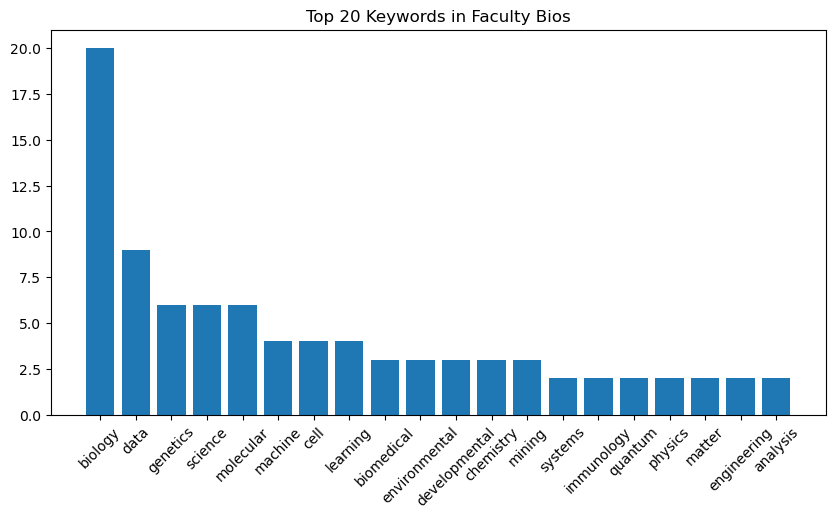

In [143]:
# Count word frequencies across all faculty
all_text = ' '.join(df['Research Topics_cleaned'].fillna(''))
words = all_text.split()
word_counts = Counter(words)

print("Top 30 words across all faculty research and interests:")
for word, count in word_counts.most_common(30):
    print(f"{word}: {count}")


# Method 2
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Research Topics_cleaned'])
word_counts = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()

word_freq_df = pd.DataFrame({'word': words, 'count': word_counts})
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)
print(word_freq_df.head(20)) #top 20 words

# Step 5: Plot
plt.figure(figsize=(10,5))
plt.bar(word_freq_df.head(20)['word'], word_freq_df.head(20)['count'])
plt.xticks(rotation=45)
plt.title('Top 20 Keywords in Faculty Bios')
plt.show()

#### N-grams to capture phrases

In [144]:
# Analyze unigrams (single words)
print("Top single terms:")
cv_unigram = CountVectorizer(ngram_range=(1,1), max_features=30)
X_unigram = cv_unigram.fit_transform(df['Research Topics_cleaned'].fillna('')) # Replace with combined_research_text for FULL descriptions
unigram_features = cv_unigram.get_feature_names_out()  
unigram_counts = X_unigram.sum(axis=0).A1
for term, count in sorted(zip(unigram_features, unigram_counts), key=lambda x: x[1], reverse=True):
    if len(term) > 2:  # Skip very short terms
        print(f"{term}: {count}")

# Analyze bigrams (two-word phrases)
print("\nTop two-word phrases:")
cv_bigram = CountVectorizer(ngram_range=(2,2), max_features=30)
X_bigram = cv_bigram.fit_transform(df['Research Topics_cleaned'].fillna(''))
bigram_features = cv_bigram.get_feature_names_out()
bigram_counts = X_bigram.sum(axis=0).A1
for term, count in sorted(zip(bigram_features, bigram_counts), key=lambda x: x[1], reverse=True):
    print(f"{term}: {count}")

# Also include trigrams for more complete phrases
print("\nTop three-word phrases:")
cv_trigram = CountVectorizer(ngram_range=(3,3), max_features=20)
X_trigram = cv_trigram.fit_transform(df['Research Topics_cleaned'].fillna(''))
trigram_features = cv_trigram.get_feature_names_out()
trigram_counts = X_trigram.sum(axis=0).A1

for term, count in sorted(zip(trigram_features, trigram_counts), key=lambda x: x[1], reverse=True):
    print(f"{term}: {count}")

Top single terms:
biology: 20
data: 9
genetics: 6
molecular: 6
science: 6
cell: 4
learning: 4
machine: 4
biomedical: 3
chemistry: 3
developmental: 3
environmental: 3
mining: 3
analysis: 2
clinical: 2
computational: 2
computing: 2
condensed: 2
cybersecurity: 2
engineering: 2
immunology: 2
matter: 2
modeling: 2
neuroscience: 2
physics: 2
quantum: 2
systems: 2
transport: 2
vision: 2
secure: 1

Top two-word phrases:
biology genetics: 6
molecular biology: 6
cell biology: 4
data science: 4
machine learning: 4
biology developmental: 3
data mining: 3
biology molecular: 2
computational biology: 2
condensed matter: 2
developmental immunology: 2
environmental engineering: 2
genetics cell: 2
genetics neuroscience: 2
immunology molecular: 2
matter physics: 2
science data: 2
aerosols air: 1
mining anomalous: 1
mining clinical: 1
mining machine: 1
mobile computing: 1
modeling groundwater: 1
nanophysics condensed: 1
natural language: 1
networks physiological: 1
neuroscience biology: 1
optical electron


Most distinctive research phrases (TF-IDF):
biology: 0.1762
science: 0.0922
data: 0.0874
biomedical: 0.0770
chemistry: 0.0756
environmental: 0.0735
biology genetics: 0.0612
genetics: 0.0612
molecular: 0.0612
molecular biology: 0.0612
molecular biology genetics: 0.0612
learning: 0.0569
machine: 0.0569
machine learning: 0.0569
analysis: 0.0558
cell: 0.0491
cell biology: 0.0491
cybersecurity: 0.0425
engineering: 0.0423
environmental engineering: 0.0423
data science: 0.0388
transport: 0.0379
condensed: 0.0354
condensed matter: 0.0354
condensed matter physics: 0.0354
matter: 0.0354
matter physics: 0.0354
physics: 0.0354
quantum: 0.0340
genetics cell: 0.0332

TF-IDF Analysis for combined research text:
biology: 0.1762
science: 0.0922
data: 0.0874
biomedical: 0.0770
chemistry: 0.0756
environmental: 0.0735
biology genetics: 0.0612
genetics: 0.0612
molecular: 0.0612
molecular biology: 0.0612
molecular biology genetics: 0.0612
learning: 0.0569
machine: 0.0569
machine learning: 0.0569
analysis: 

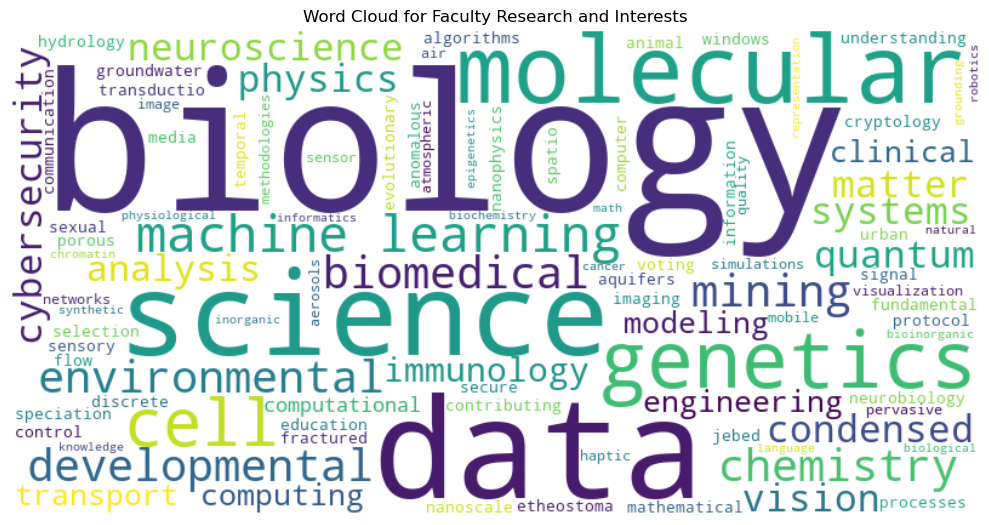

In [145]:
# TF-IDF with n-grams for more meaningful analysis
print("\nMost distinctive research phrases (TF-IDF):")
tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=50)  # 1-3 word phrases included
tfidf_matrix = tfidf.fit_transform(df['Research Topics_cleaned'].fillna(''))  # replace combined_research_text
tfidf_features = tfidf.get_feature_names_out()
tfidf_means = tfidf_matrix.mean(axis=0).A1
for term, score in sorted(zip(tfidf_features, tfidf_means), key=lambda x: x[1], reverse=True)[:30]:
    if len(term) > 2 or ' ' in term:  # Include phrases and longer words
        print(f"{term}: {score:.4f}")

# Create TF-IDF analysis for more meaningful terms
print("\nTF-IDF Analysis for combined research text:")
texts = df['Research Topics_cleaned'].fillna('').tolist()
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=50)
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_mean = tfidf_matrix.mean(axis=0).A1
tfidf_scores = {feature_names[i]: tfidf_mean[i] for i in range(len(feature_names))}
sorted_terms = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)
for term, score in sorted_terms[:20]:
    if len(term) > 2:
        print(f"{term}: {score:.4f}")

wordcloud = WordCloud(width=800, height=400, background_color='white', 
                     max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(all_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Faculty Research and Interests')
plt.axis('off')
plt.tight_layout()
plt.show()

## Topic Modeling (LDA) 
To find clusters of research areas. Group related words into topics (instead of just counting)

In [146]:
# LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-11:-1]
    top_words = [words[i] for i in top_words_idx]
    print(f"Topic {topic_idx+1}: {', '.join(top_words)}")

Topic 1: biology, molecular, genetics, cell, developmental, transport, computational, vision, immunology, neuroscience
Topic 2: computing, data, science, modeling, machine, learning, pervasive, sensor, physiological, networks
Topic 3: cybersecurity, analysis, quantum, biomedical, systems, education, cryptology, algorithms, secure, discrete
Topic 4: data, mining, environmental, engineering, condensed, matter, physics, windows, anomalous, temporal
Topic 5: data, science, learning, machine, chemistry, clinical, biomedical, informatics, biological, grounding


In [147]:
print("\nTopic Modeling for Faculty Research:")
count_vectorizer = CountVectorizer(max_features=500, ngram_range=(1,3), min_df=2) #Only terms appearing in at least 2 documents
doc_term_matrix = count_vectorizer.fit_transform(df['Research Topics_cleaned'].fillna(''))

lda = LatentDirichletAllocation(n_components=4, 
                                random_state=42, 
                                max_iter=50, 
                                learning_method='online')
doc_topic_matrix = lda.fit(doc_term_matrix)
feature_names = count_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):  #Print top terms for each topic
    top_words_idx = topic.argsort()[:-11:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"\nTopic {topic_idx+1}: {', '.join(top_words)}")


Topic Modeling for Faculty Research:

Topic 1: chemistry, environmental, engineering, environmental engineering, modeling, biomedical, biology, science, biology genetics, molecular biology

Topic 2: biology, genetics, biology genetics, molecular biology, molecular biology genetics, molecular, cell, cell biology, developmental, biology developmental

Topic 3: analysis, biomedical, systems, learning, machine, data, machine learning, mining, data mining, environmental

Topic 4: data, science, data science, learning, machine learning, machine, mining, data mining, science data, data science data


In [148]:
# Fix the LDA implementation
print("\nTopic Modeling for Faculty Research:")
count_vectorizer = CountVectorizer(max_features=500, ngram_range=(1,3), min_df=2)
doc_term_matrix = count_vectorizer.fit_transform(df['Research Topics_cleaned'].fillna(''))

# Use fit_transform instead of just fit to get the document-topic matrix
lda = LatentDirichletAllocation(n_components=4, 
                               random_state=42, 
                               max_iter=50, 
                               learning_method='online')
doc_topic_matrix = lda.fit_transform(doc_term_matrix)  # This returns the document-topic matrix

feature_names = count_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-11:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"\nTopic {topic_idx+1}: {', '.join(top_words)}")
    
    # Now you can access the topic distribution correctly
    topic_importance = doc_topic_matrix[:, topic_idx]  # This will work now
    top_doc_indices = topic_importance.argsort()[::-1]
    print("Faculty most associated with this topic:")
    num_to_display = min(5, len(df))
    for doc_idx in top_doc_indices[:num_to_display]:
        faculty_name = df.iloc[doc_idx].get('Name', f'Faculty #{doc_idx}')
        topic_prob = topic_importance[doc_idx]
        if topic_prob > 0.1:
            print(f"- {faculty_name} (Topic relevance: {topic_prob:.2f})")


Topic Modeling for Faculty Research:

Topic 1: chemistry, environmental, engineering, environmental engineering, modeling, biomedical, biology, science, biology genetics, molecular biology
Faculty most associated with this topic:
- Faculty #10 (Topic relevance: 0.85)
- Faculty #7 (Topic relevance: 0.85)
- Faculty #12 (Topic relevance: 0.75)
- Faculty #19 (Topic relevance: 0.42)
- Faculty #3 (Topic relevance: 0.25)

Topic 2: biology, genetics, biology genetics, molecular biology, molecular biology genetics, molecular, cell, cell biology, developmental, biology developmental
Faculty most associated with this topic:
- Faculty #17 (Topic relevance: 0.97)
- Faculty #6 (Topic relevance: 0.96)
- Faculty #2 (Topic relevance: 0.96)
- Faculty #15 (Topic relevance: 0.95)
- Faculty #13 (Topic relevance: 0.94)

Topic 3: analysis, biomedical, systems, learning, machine, data, machine learning, mining, data mining, environmental
Faculty most associated with this topic:
- Faculty #5 (Topic relevance:

In [151]:
# Create a DataFrame with topic distributions for all faculty
topic_names = [f"Topic {i+1}" for i in range(4)]  # For 4 topics
faculty_topic_df = pd.DataFrame(doc_topic_matrix, columns=topic_names)

# Add faculty names
if 'Name' in df.columns:
    faculty_topic_df['Name'] = df['Name']
else:
    faculty_topic_df['Faculty_ID'] = df.index

# Determine primary topic for each faculty
faculty_topic_df['Primary_Topic'] = faculty_topic_df[topic_names].idxmax(axis=1)
faculty_topic_df['Primary_Topic_Weight'] = faculty_topic_df[topic_names].max(axis=1)

# Display faculty grouped by primary topic
print("\nFaculty grouped by primary research topic:")
for topic in topic_names:
    topic_faculty = faculty_topic_df[faculty_topic_df['Primary_Topic'] == topic]
    print(f"\n{topic}:")
    # Get the key terms for this topic
    topic_idx = int(topic.split()[1]) - 1
    top_words_idx = lda.components_[topic_idx].argsort()[:-6:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Key terms: {', '.join(top_words)}")
    # Show faculty members
    for idx, row in topic_faculty.iterrows():
        faculty_name = row.get('Name', f'Faculty #{idx}')
        topic_weight = row['Primary_Topic_Weight']
        print(f"- {faculty_name} (Weight: {topic_weight:.2f})")

# Export the results to excel
# faculty_topic_df.to_excel('faculty_topic_distribution.xlsx', index=False)


Faculty grouped by primary research topic:

Topic 1:
Key terms: chemistry, environmental, engineering, environmental engineering, modeling
- Faculty #3 (Weight: 0.25)
- Faculty #7 (Weight: 0.85)
- Faculty #10 (Weight: 0.85)
- Faculty #12 (Weight: 0.75)
- Faculty #19 (Weight: 0.42)

Topic 2:
Key terms: biology, genetics, biology genetics, molecular biology, molecular biology genetics
- Faculty #0 (Weight: 0.89)
- Faculty #2 (Weight: 0.96)
- Faculty #4 (Weight: 0.89)
- Faculty #6 (Weight: 0.96)
- Faculty #8 (Weight: 0.92)
- Faculty #13 (Weight: 0.94)
- Faculty #15 (Weight: 0.95)
- Faculty #17 (Weight: 0.97)

Topic 3:
Key terms: analysis, biomedical, systems, learning, machine
- Faculty #5 (Weight: 0.75)
- Faculty #9 (Weight: 0.75)

Topic 4:
Key terms: data, science, data science, learning, machine learning
- Faculty #1 (Weight: 0.95)
- Faculty #11 (Weight: 0.92)
- Faculty #14 (Weight: 0.81)
- Faculty #16 (Weight: 0.96)
- Faculty #18 (Weight: 0.62)


In [ ]:
3,7, 11    8,9

In [131]:
df

,Faculty Name,Total Grants,Citations,Department,Research Areas.profiles,Interests.google scholar,Research Topics,Full Research Bio,Biography,Center Affiliations,Research Areas.profiles_cleaned,Interests.google scholar_cleaned,Full Research Bio_cleaned,Biography_cleaned,Research Topics_cleaned,combined_research_text
0,Philip Rous,22616358.89,NaN,Physics,NaN,NaN,"nanophysics, condensed matter physics",My main research interests are in theoretical ...,Dr. Rous joined UMBC in 1990 having held postd...,NaN,,,main research interests theoretical condensed ...,dr rous joined umbc held postdoctoral position...,nanophysics condensed matter physics,main research interests theoretical condensed ...
1,Vandana Janeja,15812252.00,1490.0,Information Systems,NaN,"data mining, anomalous windows, spatio-tempora...","data mining, anomalous windows, spatio-tempora...",Her research is centered in the area of data s...,Vandana Janeja directs the Mdata Lab with a gr...,Center for Accelerated Real Time Analytics (CA...,,data mining anomalous windows spatio temporal ...,research centered area data science focus spat...,vandana janeja directs mdata lab grant portfol...,data mining anomalous windows spatio temporal ...,data mining anomalous windows spatio temporal ...
2,Phyllis Robinson,12800198.81,4882.0,Biological Sciences,"Cell Biology, Molecular Biology & Genetics, Ne...","Biology, Sensory Biology, Vision, Vision Scien...","Cell Biology, Molecular Biology & Genetics, Ne...",The aim of my research is to understand how in...,I obtained a BA from Wellesley College and a P...,NaN,cell biology molecular biology genetics neuros...,biology sensory biology vision vision science ...,aim research understand information environmen...,obtained ba wellesley college ph university wi...,cell biology molecular biology genetics neuros...,cell biology molecular biology genetics neuros...
3,Manfred Van Dulmen,9876312.00,NaN,Academic Affairs,NaN,NaN,NaN,NaN,Manfred H. M. van Dulmen is serving as UMBC’s ...,NaN,,,,manfred h van dulmen serving umbc provost prov...,,
4,Jason Kestner,7152536.00,1353.0,Physics,NaN,"quantum information, nanoscale and condensed m...","quantum information, nanoscale and condensed m...",I am interested in developing useful physical ...,Dr. Kestner was previously a postdoctoral rese...,UMBC Quantum Science Institute,,quantum information nanoscale condensed matter...,interested developing useful physical devices ...,dr kestner previously postdoctoral researcher ...,quantum information nanoscale condensed matter...,quantum information nanoscale condensed matter...
5,Alan Sherman,5560249.00,5597.0,Computer Science and Electrical Engineering,NaN,"secure voting systems, protocol analysis, cybe...","Cybersecurity, secure voting systems, protocol...",Dr. Sherman’s research focuses on Cybersecurit...,"Alan Theodore Sherman (born February 26, 1957)...","UMBC Quantum Science Institute, UMBC Cybersecu...",,secure voting systems protocol analysis cybers...,dr sherman research focuses cybersecurity secu...,alan theodore sherman born february american c...,cybersecurity secure voting systems protocol a...,secure voting systems protocol analysis cybers...
6,Rachel Brewster,5042807.27,NaN,Biological Sciences,"Cell Biology, Developmental & Immunology, Mole...",NaN,"Cell Biology, Developmental & Immunology, Mole...",Research Interests in Regulation of brain deve...,Received a BS degree from the University of Ge...,NaN,cell biology developmental immunology molecula...,,research interests regulation brain developmen...,received bs degree university geneva switzerla...,cell biology developmental immunology molecula...,cell biology developmental immunology molecula...
7,Claire Welty,4247478.00,NaN,"Chemical, Biochemical and Environmental Engine...","Urban hydrology, Contributing to fundamental u...",NaN,"Environmental Engineering, Urban hydrology, Co...",Our interest is in developing an end-to-end sy...,Professor of Environmental Engineering and Dir...,Center for Urba

# Supervised Learning 
Using predefined HERD topics

In [27]:
# We'll use a pre-trained sentence transformer model to generate embeddings
# pip install sentence-transformers
import streamlit as st
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')  # 'all-mpnet-base-v2' model for better quality; 'all-MiniLM-L6-v2' basic

# # Define categories
# categories = [
#     "Computer and information sciences",
#     "Atmospheric science and meteorology",
#     "Geological and earth sciences",
#     "ocean sciences and marine sciences",
#     # "Life sciences",
#     "Agricultural sciences",
#     "Biological and biomedical sciences",
#     "Health sciences",
#     "Natural resources and conservation",
#     "Mathematics and statistics",
#     # "Physical sciences",
#     "Astronomy and astrophysics",
#     "Chemistry",
#     "Materials science",
#     "Physics",
#     "Psychology",
#     # "Social sciences",
#     "Economics",
#     "Political science and government",
#     "Sociology, demography, and population studies",
#     "Sociology",
#     "Aerospace, aeronautical, and astronautical engineering",
#     "Bioengineering and biomedical engineering",
#     "Chemical engineering",
#     "Civil engineering",
#     "Electrical, electronic, and communications engineering",
#     "Industrial and manufacturing engineering",
#     "Mechanical engineering",
#     "Metallurgical and materials engineering",
#     "Business management and business administration",
#     "Education", 
#     "Humanities",
#     "Law",
#     "Social work",
#     "Visual and performing arts",
# ]

categories = [     
    "Computer and information sciences, general",
    "Artificial intelligence and robotics",
    "Information technology",
    "Informatics",
    "Computer science, other",
    "Computer programming/programmer, general",
    "Computer programming special applications",
    "Computer Programming, Vendor/Product Certification",
    "Computer programming, other",
    "Data processing and data processing technology/technician",
    "Information science/studies",
    "Computer science",
    "Web page, digital/multimedia, and information resources design",
    "Data modeling/warehousing and database administration",
    "Computer graphics",
    "Modeling, virtual environments and simulation",
    "Computer software and media applications, other",
    "Computer systems networking and telecommunications",
    "System administration/administrator",
    "System, networking, and LAN/WAN management/manager",
    "Computer and information systems security",
    "Web/multimedia management and Webmaster",
    "Information technology project management",
    "Computer support specialist",
    "Computer/information technology services administration and management, other",

    "Atmospheric sciences and meteorology, general",
    "Atmospheric Chemistry and Climatology",
    "Atmospheric physics and dynamics",
    "Meteorology",

    "Geology",
    "Geochemistry",
    "Paleontology",
    "Geophysics and seismology",
    "Mineralogy and petrology",
    "Stratigraphy and sedimentation",
    "Geomorphology and glacial geology",
    "Geological and earth sciences, general",

    "Marine biology and biological oceanography",
    "Marine sciences",
    "Hydrology and water resources science",
    "Oceanography, chemical and physical",

    "Agricultural economics",
    "Natural resources/environmental economics",
    "Agricultural animal breeding",
    "Animal nutrition",
    "Animal science",
    "Agronomy and crop science",
    "Agricultural and horticultural plant breeding",
    "Environmental science",
    "Plant pathology/phytopathology ",
    "Plant sciences, other",
    "Food science",
    "Food science and technology",
    "Soil chemistry/microbiology/physics",
    "Soil sciences",
    "Horticulture science",
    "Fishing and fisheries sciences/management",
    "Forest sciences and biology",
    "Forest/resources management",
    "Wood science and pulp/paper technology",
    "Natural resources/conservation ",
    "Forestry and related sciences, other",
    "Wildlife/range management",
    "Environmental science",
    "Agriculture, general",
    "Agricultural science, other",
    "Natural resource/environmental policy",

    "Biological sciences",
    "Biochemistry",
    "Bioinformatics",
    "Biomathematics",
    "Biomedical sciences",
    "Computational biology",
    "Biophysics",
    "Biotechnology",
    "Bacteriology",
    "Plant genetics",
    "Plant pathology/phytopathology",
    "Plant physiology",
    "Botany/plant biology",
    "Aquatic biology",
    "Anatomy",
    "Conservation biology",
    "Biometrics and biostatistics",
    "Epidemiology",
    "Cell/cellular biology and histology",
    "Evolutionary biology",
    "Ecology",
    "Developmental biology/embryology",
    "Endocrinology",
    "Entomology",
    "Immunology",
    "Molecular biophysics",
    "Molecular biochemistry",
    "Molecular biology",
    "Structural biology",
    "Microbiology",
    "Cancer biology",
    "Molecular medicine",
    "Neuroscience",
    "Nutrition sciences",
    "Radiation biology/radiobiology",
    "Parasitology",
    "Environmental toxicology",
    "Virologye",
    "Toxicology",
    "Genetics, other",
    "Genome sciences/genomics",
    "Genetics/genomics, human and animal",
    "Pathology, human and animal",
    "Pharmacology, human and animal",
    "Physiology, human and animal",
    "Wildlife biology",
    "Zoology, other",
    "Reproductive biology",
    "Cardiovascular science",
    "Exercise physiology",
    "Vision science/physiological optics",
    "Biology/biomedical sciences, general",
    "Biology/biomedical sciences, other",

    "Oral biology/oral pathology",
    "Environmental health",
    "Environmental toxicology",
    "Health systems/services administration",
    "Health services research",
    "Public health",
    "Epidemiology",
    "Kinesiology/exercise science",
    "Gerontology",
    "Nursing science",
    "Medicinal/pharmaceutical sciences",
    "Rehabilitation/therapeutic services",
    "Veterinary sciences",
    "Health and behavioral",
    "Health sciences, general",
    "Health sciences, other",
    "Medical physics/radiological sciencee",
    "Audiology/audiologist and hearing sciences",
    "Speech-language pathology/pathologist",
    "Communication disorders",
    "Dental clinical sciences, general",
    "Oral/maxillofacial surgery",
    "Pediatric dentistry/pedodontics",
    "Hospital and health care facilities administration/management",
    "Anesthesiology",
    "Gene/genetic therapy",
    "Pharmaceutics and drug design",
    "Pharmacy administration and pharmacy policy and regulatory affairs",
    "Pharmacoeconomics/pharmaceutical economics",
    "Clinical and industrial drug development",
    "Maternal and child health",
    "Veterinary sciences",
    "Dietetics/dietitian",
    "Holistic health",
    "Herbalism",
    "Psychiatric/mental health",

    "Mathematics, general",
    "Analysis and functional analysis",
    "Mathematics, other",
    "Applied mathematics",
    "Computational mathematics",
    "Computational and applied mathematics",
    "Financial mathematics",
    "Mathematical biology",
    "Applied mathematics, other",
    "Statistics, general",
    "Mathematical statistics and probability",
    "Mathematics and statistics",
    "Operations research",
    "Mathematics and statistics, other",
    "Business statistics",
    "Actuarial science",
    "Geometry/geometric analysis",
    "Number theory",
    "Topology/foundations",

    "Astronomy",
    "Astrophysics",
    "Planetary astronomy and science",
    "Astronomy and astrophysics, other",

    "Chemistry, general",
    "Analytical chemistry",
    "Inorganic chemistry",
    "Organic chemistry",
    "Physical and theoretical chemistry",
    "Polymer chemistry",
    "Chemical physics",
    "Environmental chemistry",
    "Forensic chemistry",
    "Theoretical chemistry",
    "Chemistry, other",
    "Medicinal and pharmaceutical chemistry",

    "Physics, general",
    "Atomic/molecular/chemical physics",
    "Elementary particle physics",
    "Nuclear physics",
    "Optics/optical sciences",
    "Solid state and low-temperature physics",
    "Acoustics",
    "Theoretical and mathematical physics",
    "Physics, other",
    "Polymer physics",
    "Plasma/fusion physics",
    "Biophysics",

    "Applied physics",
    "Physical sciences",
    "Materials chemistry",
    "Physical sciences, other",

    "Anthropology",
    "Economics",
    "Political science",

    "Psychology, general",
    "Cognitive psychology and psycholinguistics",
    "Comparative psychology",
    "Developmental and child psychology",
    "Experimental psychology",
    "Personality psychology",
    "Physiological psychology/psychobiology",
    "Social psychology",
    "Psychometrics and quantitative psychology",
    "Psychopharmacology",
    "Research and experimental psychology, other",
    "Clinical psychology",
    "Community psychology",
    "Counseling psychology",
    "Industrial and organizational psychology",
    "Clinical child psychology",
    "Environmental psychology",
    "Geropsychology",
    "Health/medical psychology",
    "Family psychology",
    "Forensic psychology",
    "Applied psychology",
    "Applied behavior analysis",
    "Clinical, counseling and applied psychology, other",
    "Psychology, other",
    "Psychoanalysis and psychotherapy",

    "Sociology",
    "Sociology and anthropology",
    "Rural sociology",

    "Health policy analysis",
    "Gender and women's studies",
    "Area/ethnic/cultural/gender studies",
    "Criminal justice and corrections",
    "Criminology",
    "Demography/population studies",
    "Geography",
    "International relations/affairs",
    "Applied linguistics",
    "Linguistics",
    "Public policy analysis",
    "Gerontology ",
    "Statistics",
    "Urban affairs/studies",
    "Urban/city, community, and regional planning",
    "Social sciences, general",
    "Social sciences, other",
    "American/U.S. studies",


    "Aerospace, aeronautical, and astronautical engineering",
    "Bioengineering and biomedical engineering",
    "Chemical engineering",
    "Chemical and biomolecular engineering",

    "Civil engineering",
    "Geotechnical engineering",
    "Structural engineering",
    "Transportation and highway engineering",
    "Water resources engineering",

    "Electrical and electronics engineering",
    "Laser and optical engineering",
    "Telecommunications engineering",

    "Industrial engineering",
    "Manufacturing engineering",
    "Engineering/industrial management",

    "Materials engineering",
    "Materials science",
    "Mechanical engineering",

    "Agricultural/biological engineering and bioengineering",
    "Architectural engineering",
    "Ceramic sciences and engineering",
    "Computer engineering, general",
    "Computer hardware engineering",
    "Computer software engineering",
    "Computer engineering, other",
    "Engineering mechanics",
    "Engineering physics",
    "Engineering science",
    "Environmental/environmental health engineering",
    "Metallurgical engineering",
    "Mining and mineral engineering",
    "Naval architecture and marine engineering",
    "Nuclear engineering",
    "Ocean engineering",
    "Petroleum engineering",
    "Systems engineering",
    "Textile sciences and engineering",
    "Polymer/plastics engineering",
    "Construction engineering",
    "Forest engineering",
    "Operations research",
    "Surveying engineering",
    "Geological/geophysical engineering",
    "Paper science and engineering",
    "Electromechanical engineering",
    "Mechatronics, robotics, and automation engineering",
    "Biochemical engineering",
    "Engineering chemistry",
    "Biological/biosystems engineering",
    "Engineering, other",
    "Cartography",

    "Education",
    "Humanities and arts" 
]

category_embeddings = model.encode(categories)

# Function to classify faculty research based on semantic similarity
def classify_by_embeddings(text, categories, category_embeddings, model, top_n=2):
    # Generate embedding for the faculty research text
    text_embedding = model.encode([text])[0]
    
    # Calculate similarity to each category
    similarities = cosine_similarity([text_embedding], category_embeddings)[0]
    
    # Get indices of top n categories
    top_indices = similarities.argsort()[-top_n:][::-1]
    
    # Return top categories and their similarity scores
    results = []
    for idx in top_indices:
        results.append({
            'category': categories[idx],
            'similarity': similarities[idx]
        })
    
    return results

# Apply to all faculty
results = []
for idx, row in df.iterrows():
    faculty_name = row.get('Name', f'Faculty #{idx}')
    research_text = row['combined_research_text']
    
    # Skip empty entries
    if pd.isna(research_text) or research_text == "":
        continue
    
    # Get classifications
    classifications = classify_by_embeddings(
        research_text, 
        categories,
        category_embeddings,
        model,
        3
    )
    
    # Store results
    faculty_result = {
        'Faculty': faculty_name,
        'Primary_Category': classifications[0]['category'],
        'Primary_Score': classifications[0]['similarity'],
    }
    
    # Add secondary category if available
    if len(classifications) > 1:
        faculty_result['Secondary_Category'] = classifications[1]['category']
        faculty_result['Secondary_Score'] = classifications[1]['similarity']
        
        faculty_result['Third_Category'] = classifications[2]['category']
        faculty_result['Third_Score'] = classifications[2]['similarity']
    
    results.append(faculty_result)

# Convert to DataFrame
classification_df = pd.DataFrame(results)

In [28]:
classification_df #basic

,Faculty,Primary_Category,Primary_Score,Secondary_Category,Secondary_Score,Third_Category,Third_Score
0,Faculty #0,Materials science,0.568003,Physical and theoretical chemistry,0.452423,Atomic/molecular/chemical physics,0.442369
1,Faculty #1,Information science/studies,0.412565,"Computer and information sciences, general",0.377520,Informatics,0.357299
2,Faculty #2,Vision science/physiological optics,0.588134,Biological sciences,0.524926,Biological/biosystems engineering,0.511721
3,Faculty #3,Family psychology,0.499908,Developmental and child psychology,0.451641,Social psychology,0.450333
4,Faculty #4,Atomic/molecular/chemical physics,0.396100,Solid state and low-temperature physics,0.351241,Materials science,0.345808
5,Faculty #5,Computer and information systems security,0.428820,Computer science,0.346480,Computational mathematics,0.334779
6,Faculty #6,Developmental biology/embryology,0.482377,Neuroscience,0.435611,Developmental and child psychology,0.407068
7,Faculty #7,Hydrology and water resources science,0.605519,Water resources engineering,0.485168,"Urban/city, community, and regional planning",0.422440
8,Faculty #8,Evolutionary biology,0.556553,Wildlife biology,0.470522,Aquatic biology,0.456261
9,Faculty #9,Computer graphics,0.423957,Vision science/physiological optics,0.403734,"Modeling, virtual environments and simulation",0.367512


In [49]:
df

,Faculty Name,Total Grants,Citations,Department,Research Areas.profiles,Interests.google scholar,Research Topics,Full Research Bio,Biography,Center Affiliations,Research Areas.profiles_cleaned,Interests.google scholar_cleaned,Full Research Bio_cleaned,Biography_cleaned,Research Topics_cleaned,combined_research_text
0,Philip Rous,22616358.89,NaN,Physics,NaN,NaN,"nanophysics, condensed matter physics",My main research interests are in theoretical ...,Dr. Rous joined UMBC in 1990 having held postd...,NaN,,,main research interests theoretical condensed ...,dr rous joined umbc held postdoctoral position...,nanophysics condensed matter physics,main research interests theoretical condensed ...
1,Vandana Janeja,15812252.00,1490.0,Information Systems,NaN,"data mining, anomalous windows, spatio-tempora...","Data science, data mining, anomalous windows, ...",Her research is centered in the area of data s...,Vandana Janeja directs the Mdata Lab with a gr...,Center for Accelerated Real Time Analytics (CA...,,data mining anomalous windows spatio temporal ...,research centered area data science focus spat...,vandana janeja directs mdata lab grant portfol...,data science data mining anomalous windows spa...,data mining anomalous windows spatio temporal ...
2,Phyllis Robinson,12800198.81,4882.0,Biological Sciences,"Cell Biology, Molecular Biology & Genetics, Ne...","Biology, Sensory Biology, Vision, Vision Scien...","Cell Biology, Molecular Biology & Genetics, Ne...",The aim of my research is to understand how in...,I obtained a BA from Wellesley College and a P...,NaN,cell biology molecular biology genetics neuros...,biology sensory biology vision vision science ...,aim research understand information environmen...,obtained ba wellesley college ph university wi...,cell biology molecular biology genetics neuros...,cell biology molecular biology genetics neuros...
3,Manfred Van Dulmen,9876312.00,NaN,Academic Affairs,adolescent and young adult relationships and e...,NaN,NaN,Manfred H. M. van Dulmen is serving as UMBC’s ...,Manfred H. M. van Dulmen is serving as UMBC’s ...,NaN,adolescent young adult relationships experienc...,,manfred h van dulmen serving umbc provost prov...,manfred h van dulmen serving umbc provost prov...,,adolescent young adult relationships experienc...
4,Jason Kestner,7152536.00,1353.0,Physics,NaN,"quantum information, nanoscale and condensed m...","quantum information, nanoscale and condensed m...",I am interested in developing useful physical ...,Dr. Kestner was previously a postdoctoral rese...,UMBC Quantum Science Institute,,quantum information nanoscale condensed matter...,interested developing useful physical devices ...,dr kestner previously postdoctoral researcher ...,quantum information nanoscale condensed matter...,quantum information nanoscale condensed matter...
5,Alan Sherman,5560249.00,5597.0,Computer Science and Electrical Engineering,NaN,"secure voting systems, protocol analysis, cybe...","Cybersecurity, secure voting systems, protocol...",Dr. Sherman’s research focuses on Cybersecurit...,"Alan Theodore Sherman (born February 26, 1957)...","UMBC Quantum Science Institute, UMBC Cybersecu...",,secure voting systems protocol analysis cybers...,dr sherman research focuses cybersecurity secu...,alan theodore sherman born february american c...,cybersecurity secure voting systems protocol a...,secure voting systems protocol analysis cybers...
6,Rachel Brewster,5042807.27,NaN,Biological Sciences,"Cell Biology, Developmental & Immunology, Mole...",NaN,"Cell Biology, Developmental & Immunology, Mole...",Research Interests in Regulation of brain deve...,Received a BS degree from the University of Ge...,NaN,cell biology developmental immunology molecula...,,research interests regulation brain developmen...,received bs degree university geneva switzerla...,cell biology developmental immunology molecula...,cell biology developmental immunology molecula...
7,Claire Welty,4247478.00,NaN,"Chemical, Biochemical and Environme

In [ ]:
category_examples = {
    "Information and Computer Sciences": [
        "Research on neural networks for robotics control systems",
        "Developing NLP algorithms to enable robots to understand human commands",
        "Machine learning applications in autonomous systems and robots",
        "Human-robot interaction through natural language understanding"
    ],
    "Psychology": [
        "Studying human cognitive biases in decision making",
        "Research on developmental psychology in early childhood",
        "Exploring emotional responses to social stimuli",
        "Psychological aspects of human-computer interaction"
    ],
    # Other categories with examples...
}

# Create embeddings that average the examples for each category
category_embeddings = []
for category, examples in category_examples.items():
    # Add the category name as an additional example
    examples.append(category)
    # Encode all examples
    example_embeddings = model.encode(examples)
    # Use the average embedding
    avg_embedding = example_embeddings.mean(axis=0)
    category_embeddings.append(avg_embedding)

category_embeddings = np.array(category_embeddings)

In [ ]:
# from sentence_transformers import SentenceTransformer, InputExample, losses
# from torch.utils.data import DataLoader

# # Create labeled examples from your corrections
# train_examples = [
#     InputExample(texts=["research on combining robotics, machine learning, and natural language processing to help robots understand human language"], label="Information and Computer Sciences"),
#     # Add more examples from your corrections
# ]

# # Convert to a format the model can train on
# train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=16)
# train_loss = losses.CosineSimilarityLoss(model)

# # Fine-tune the model
# model.fit(train_dataloader, epochs=10, warmup_steps=100)

## Cosine Similarity 

In [117]:
# from sklearn.metrics.pairwise import cosine_similarity

# similarity_matrix = cosine_similarity(tfidf_matrix)

# # Find faculty with similar research interests
# for i in range(len(df)):
#     # Get top 3 most similar faculty members (excluding self)
#     similar_indices = similarity_matrix[i].argsort()[::-1][1:4]  # Skip first (self)
#     print(f"\nFaculty similar to {df.iloc[i].get('Name', f'Faculty #{i}')}:")
#     for idx in similar_indices:
#         similarity_score = similarity_matrix[i][idx]
#         print(f"- {df.iloc[idx].get('Name', f'Faculty #{idx}')} (Similarity: {similarity_score:.2f})")

In [ ]:
3